In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot  
from statsmodels.tsa.stattools import adfuller

In [2]:
#Importing data
Shanghai = pd.read_csv("/Users/kayinho/Downloads/FiveCitiePMData/ShanghaiPM20100101_20151231.csv")

In [3]:
Shanghai.drop(['PM_Jingan', 'season', 'precipitation', 'Iprec', 'cbwd'], 
               axis=1,
              inplace=True)

In [4]:
# from datetime import datetime
Shanghai.dropna(axis=0, how="any",inplace=True)

In [5]:
Shanghai['Year.Month'] = Shanghai['year'].map(str) +"/"+ Shanghai['month'].map(str) 
Shanghai['Date'] = pd.to_datetime(Shanghai['year'].map(str) +"/"+ Shanghai['month'].map(str) +"/"+ Shanghai['day'].map(str))
#Shanghai


In [6]:
Shanghai.groupby(['year']).size()
#Shanghai_1

year
2013    7955
2014    8232
2015    8245
dtype: int64

In [7]:
Shanghai_1 = Shanghai.groupby(['Date']).mean()
Shanghai_1.index = pd.to_datetime(Shanghai_1.index, 
                             format='%d-%m-%Y %H:%M')
#Shanghai_1 = Shanghai_1.set_index(Shanghai_1.index).asfreq('H')
#Shanghai_1 = Shanghai_1.fillna(method='ffill')
Shanghai_1['Date'] = Shanghai_1.index


In [8]:
Shanghai_1314 = Shanghai_1[(Shanghai_1['Date'] >=pd.to_datetime('2013-01-01')) & (Shanghai_1['Date'] <= pd.to_datetime('2014-12-31'))]
Shanghai_1314 

,No,year,month,day,hour,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,Iws,Date
Date,,,,,,,,,,,,,
2013-01-01,26316.909091,2013.0,1.0,1.0,11.909091,79.272727,82.136364,-4.500000,58.956364,1023.181818,3.636364,20.954545,2013-01-01
2013-01-02,26340.619048,2013.0,1.0,2.0,11.619048,56.333333,46.952381,-2.523810,66.739524,1029.904762,3.190476,67.428571,2013-01-02
2013-01-03,26364.500000,2013.0,1.0,3.0,11.500000,45.875000,35.875000,-4.791667,73.949583,1038.583333,-0.708333,49.791667,2013-01-03
2013-01-04,26388.500000,2013.0,1.0,4.0,11.500000,49.250000,43.750000,-2.666667,78.890417,1031.708333,0.666667,53.833333,2013-01-04
2013-01-05,26412.550000,2013.0,1.0,5.0,11.550000,55.550000,47.050000,-1.250000,79.143500,1027.350000,2.150000,40.800000,2013-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,43717.000000,2014.0,12.0,27.0,12.000000,28.608696,24.782609,0.695652,61.232174,1029.173913,7.869565,92.782609,2014-12-27
2014-12-28,43740.500000,2014.0,12.0,28.0,11.500000,69.833333,73.916667,1.416667,69.865000,1023.875000,6.791667,4.833333,2014-12-28
2014-12-29,43765.045455,2014.0,12.0,29.0,12.045455,139.863636,142.590909,0.545455,60.625000,1019.454545,8.181818,6.545455,2014-12-29


In [37]:
Shanghai_13 = Shanghai_1[(Shanghai_1['Date'] >=pd.to_datetime('20130101')) & (Shanghai_1['Date'] <= pd.to_datetime('20131231'))]
Shanghai_14 = Shanghai_1[(Shanghai_1['Date'] >=pd.to_datetime('20140101')) & (Shanghai_1['Date'] <= pd.to_datetime('20141231'))]
Shanghai_15 = Shanghai_1[(Shanghai_1['Date'] >=pd.to_datetime('20150101')) & (Shanghai_1['Date'] <= pd.to_datetime('20151231'))]


In [170]:
Shanghai_13['PM_US Post'].describe()

count    363.000000
mean      59.738716
std       45.142902
min        5.642857
25%       29.333992
50%       48.304348
75%       77.173913
max      373.272727
Name: PM_US Post, dtype: float64

In [171]:
Shanghai_14['PM_US Post'].describe()

count    365.000000
mean      49.790158
std       29.776088
min        8.095238
25%       29.434783
50%       43.291667
75%       63.304348
max      195.444444
Name: PM_US Post, dtype: float64

In [172]:
Shanghai_15['PM_US Post'].describe()

count    362.000000
mean      50.691755
std       32.839919
min        6.846154
25%       28.895833
50%       41.795833
75%       62.571105
max      220.958333
Name: PM_US Post, dtype: float64

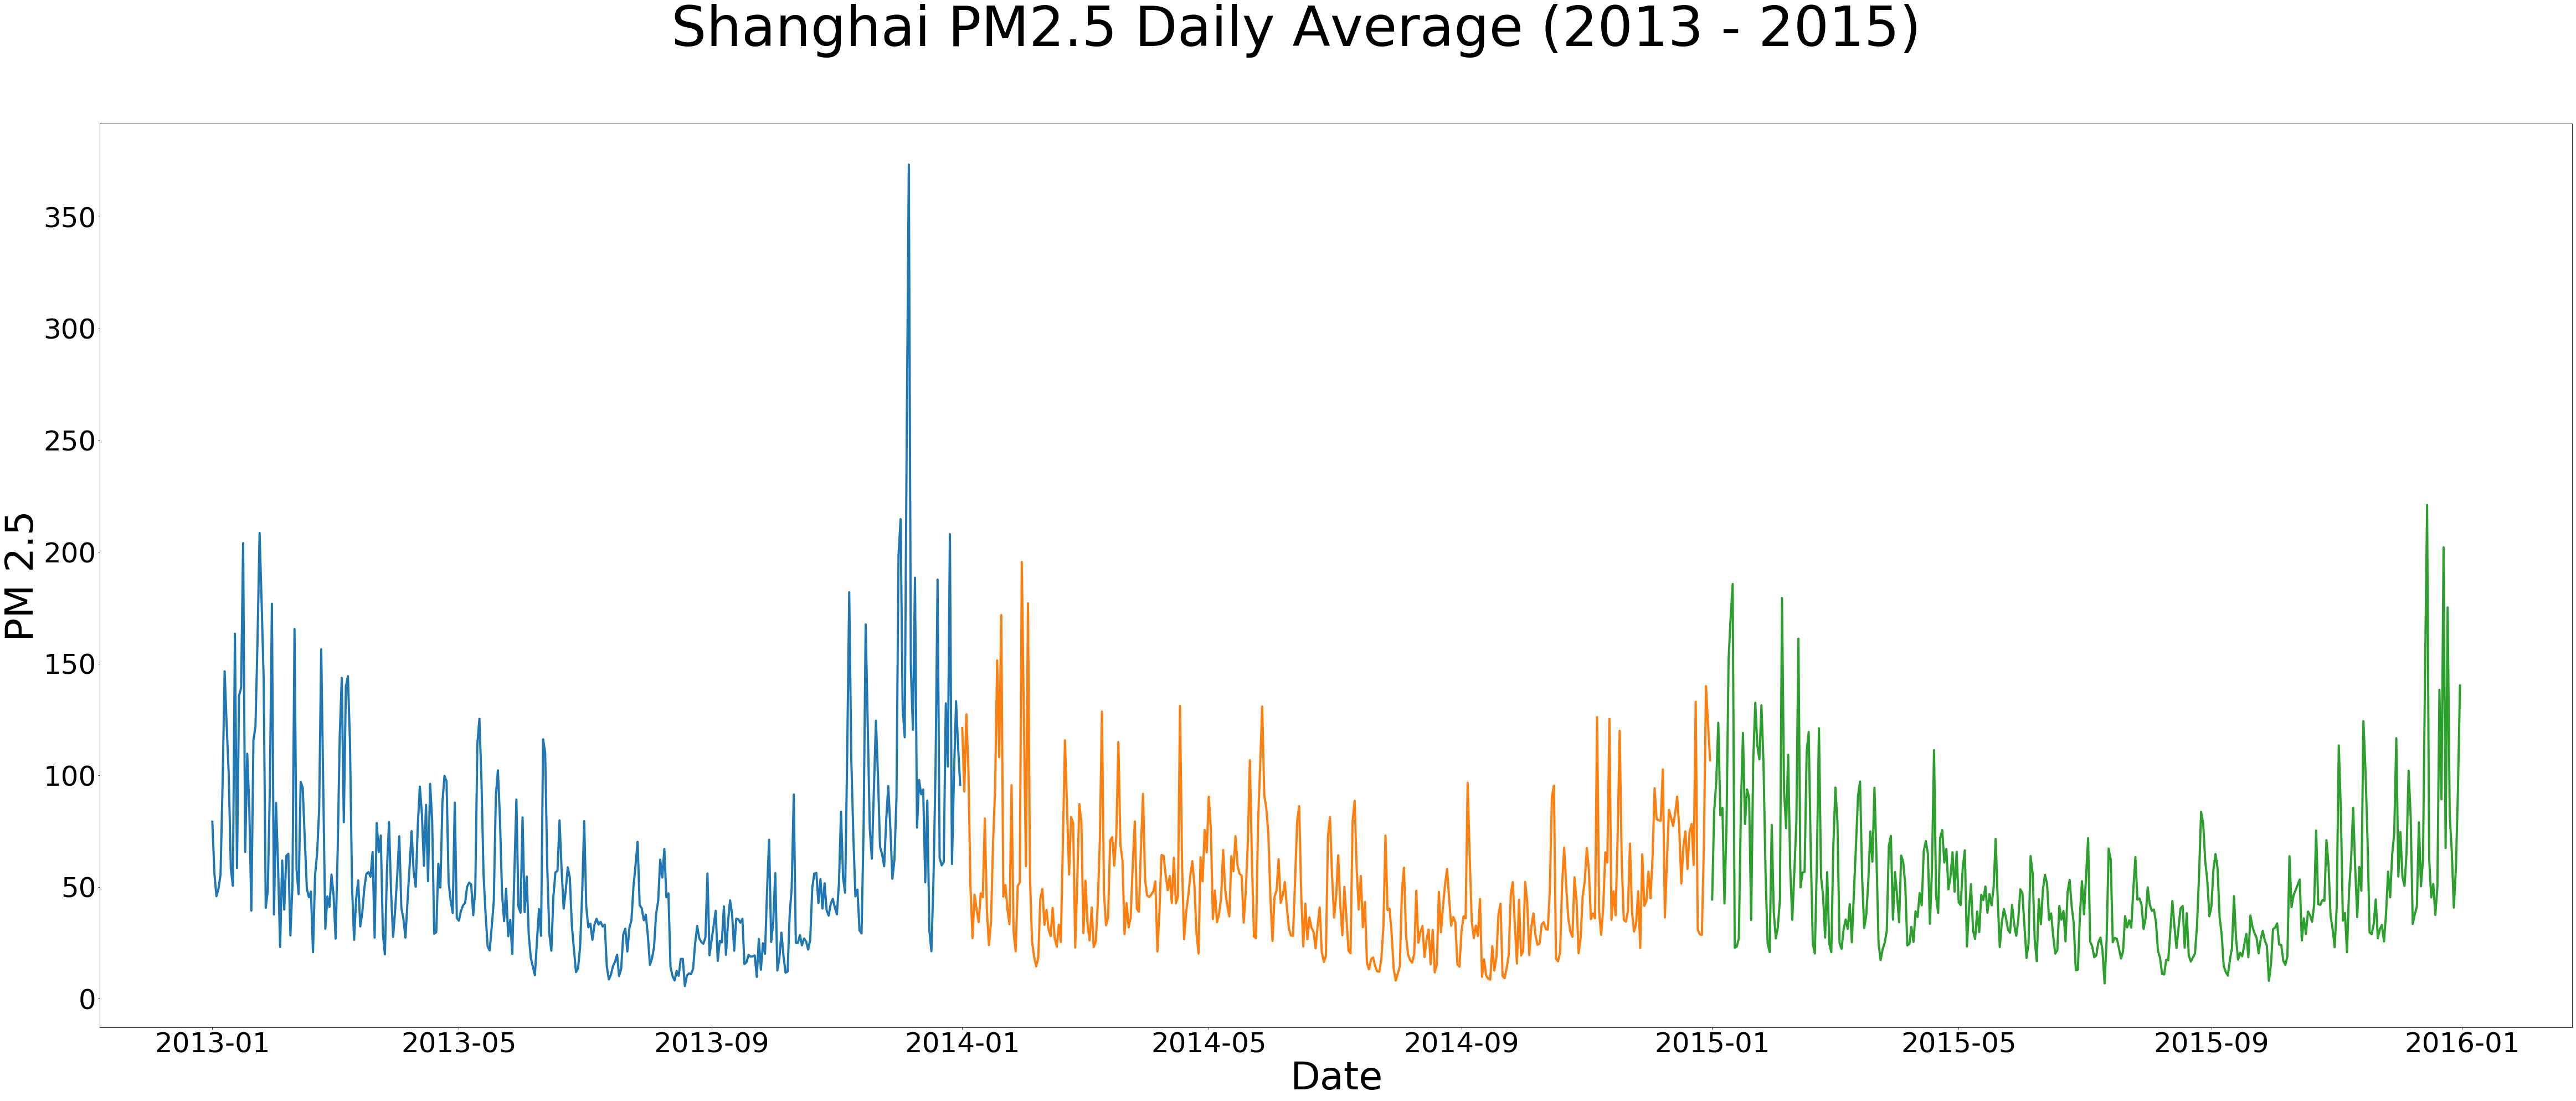

In [115]:
plt.figure(figsize=(80,30)).suptitle('Shanghai PM2.5 Daily Average (2013 - 2015)', fontsize=100)
plt.plot(Shanghai_13['Date'], Shanghai_13['PM_US Post'], linewidth=4)
plt.plot(Shanghai_14['Date'], Shanghai_14['PM_US Post'], linewidth=4)
plt.plot(Shanghai_15['Date'], Shanghai_15['PM_US Post'], linewidth=4)


plt.xlabel('Date', fontsize=70)
plt.ylabel('PM 2.5', fontsize=70)
plt.xticks(fontsize=50, rotation=0)
plt.yticks(fontsize=50, rotation=0)
plt.show()

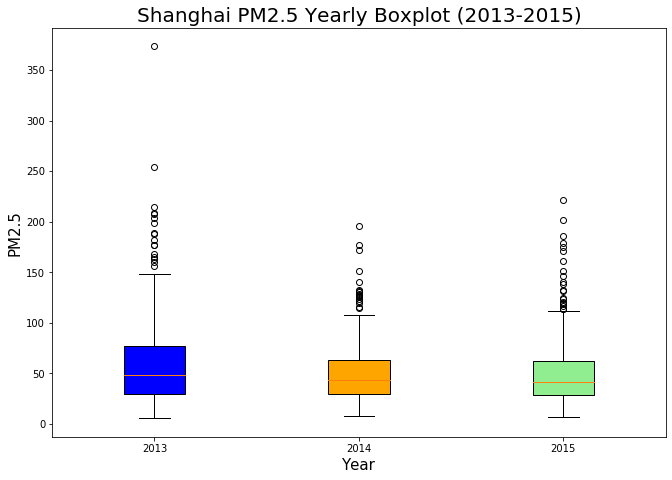

In [168]:
all_data = [Shanghai_13['PM_US Post'], Shanghai_14['PM_US Post'], Shanghai_15['PM_US Post']]
labels = ['2013', '2014', '2015']

fig, ax = plt.subplots()
fig.subplots_adjust(left=0.08, right=1.5, bottom=0.08, top=1.5,
                    hspace=0.4, wspace=0.3)
bplot = ax.boxplot(all_data, patch_artist=True, labels=labels, widths = 0.3) # 设置箱型图可填充
colors = ['blue', 'orange', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)  # 为不同的箱型图填充不同的颜色

plt.title('Shanghai PM2.5 Yearly Boxplot (2013-2015)', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('PM2.5', fontsize = 15)
plt.show()

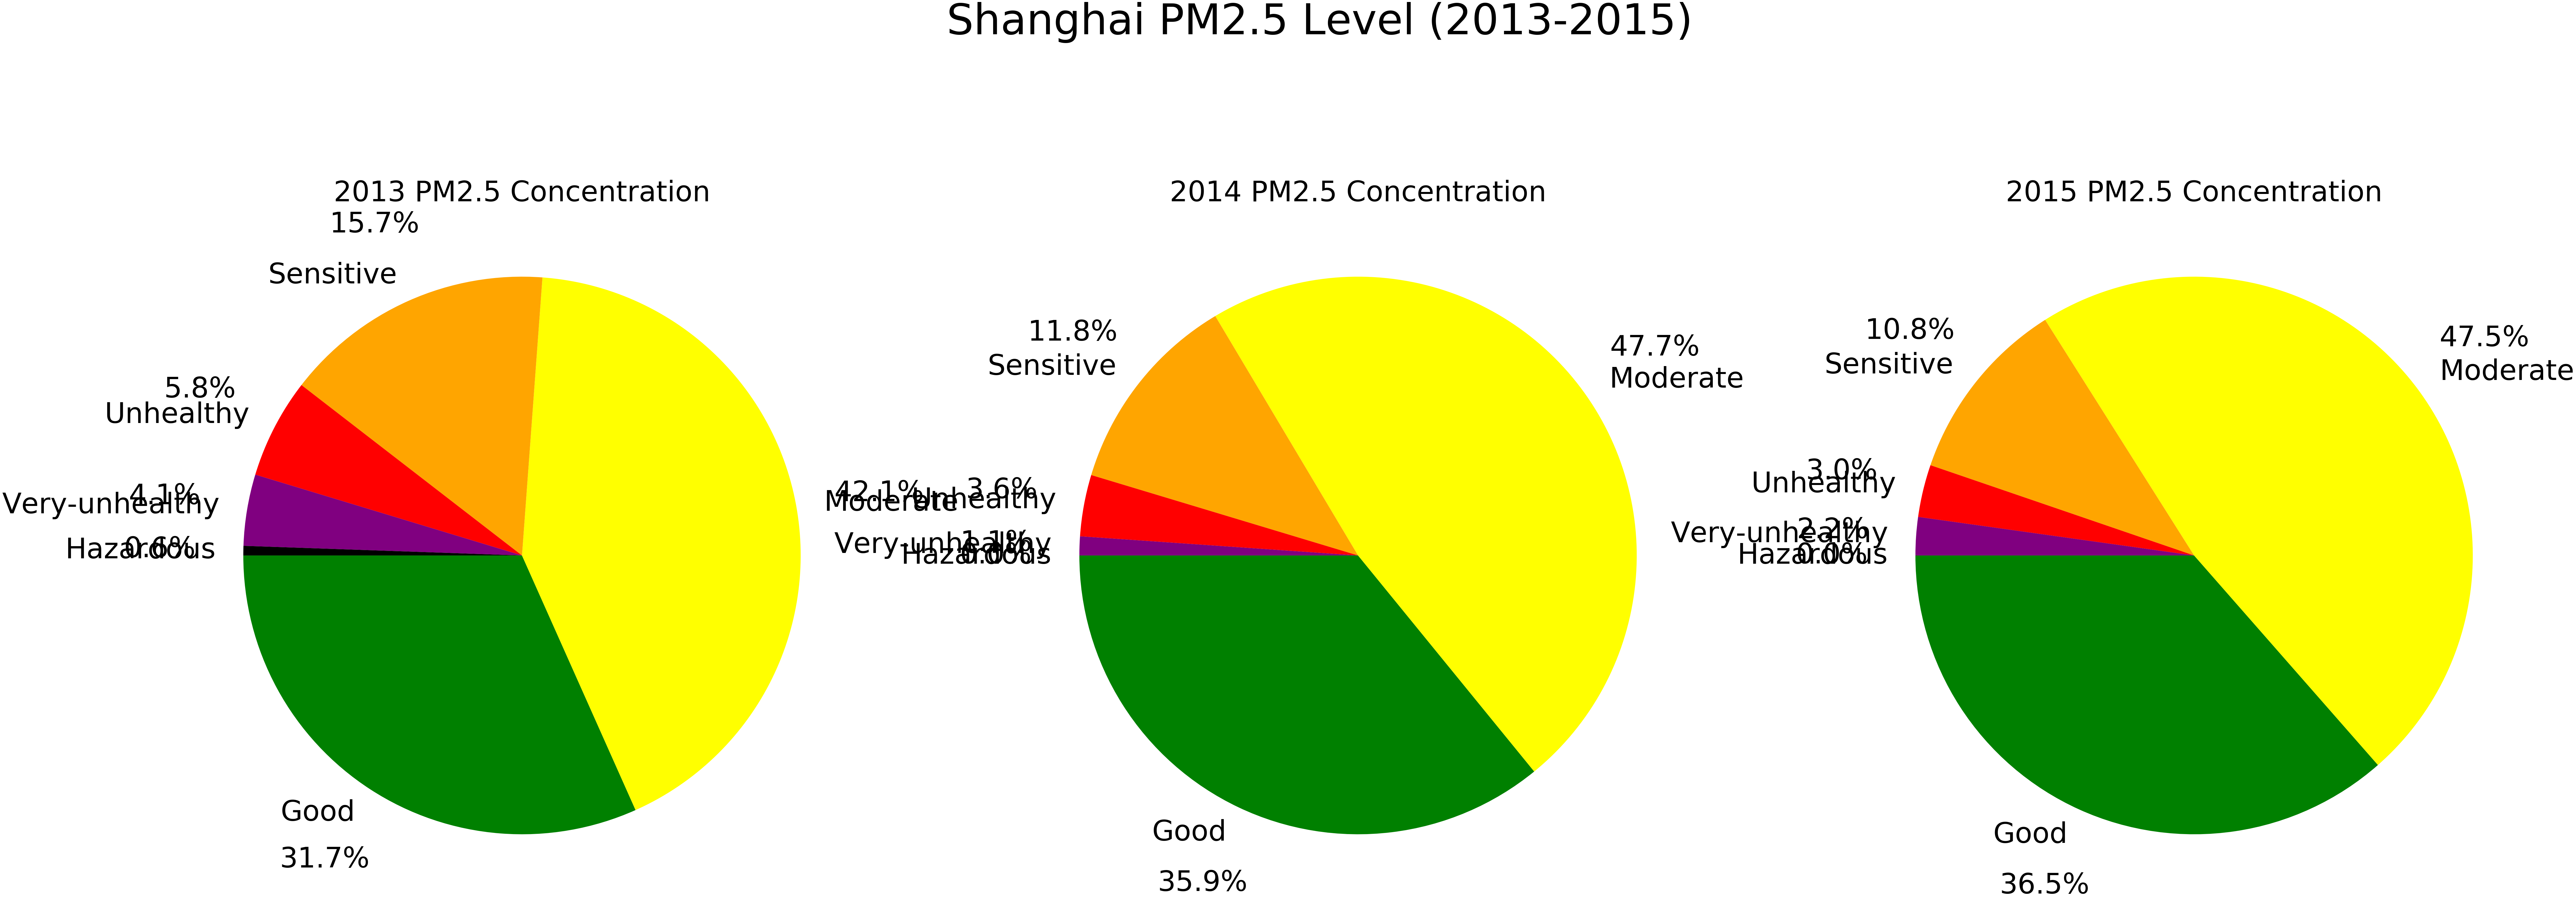

In [160]:
Good_13 = sum(Shanghai_13['PM_US Post'] <= 35)
Moderate_13 = sum((Shanghai_13['PM_US Post'] >35) & (Shanghai_13['PM_US Post'] <=75))
Sensitive_13 = sum((Shanghai_13['PM_US Post'] >75) & (Shanghai_13['PM_US Post'] <=115))
Unhealthy_13 = sum((Shanghai_13['PM_US Post'] >115) & (Shanghai_13['PM_US Post'] <=150))
Severe_13 = sum((Shanghai_13['PM_US Post'] >150) & (Shanghai_13['PM_US Post'] <=250))
Hazardous_13 =sum(Shanghai_13['PM_US Post'] > 250)

Good_14 = sum(Shanghai_14['PM_US Post'] <= 35)
Moderate_14 = sum((Shanghai_14['PM_US Post'] >35) & (Shanghai_14['PM_US Post'] <=75))
Sensitive_14 = sum((Shanghai_14['PM_US Post'] >75) & (Shanghai_14['PM_US Post'] <=115))
Unhealthy_14 = sum((Shanghai_14['PM_US Post'] >115) & (Shanghai_14['PM_US Post'] <=150))
Severe_14 = sum((Shanghai_14['PM_US Post'] >150) & (Shanghai_14['PM_US Post'] <=250))
Hazardous_14 =sum(Shanghai_14['PM_US Post'] > 250)

Good_15 = sum(Shanghai_15['PM_US Post'] <= 35)
Moderate_15 = sum((Shanghai_15['PM_US Post'] >35) & (Shanghai_15['PM_US Post'] <=75))
Sensitive_15 = sum((Shanghai_15['PM_US Post'] >75) & (Shanghai_15['PM_US Post'] <=115))
Unhealthy_15 = sum((Shanghai_15['PM_US Post'] >115) & (Shanghai_15['PM_US Post'] <=150))
Severe_15 = sum((Shanghai_15['PM_US Post'] >150) & (Shanghai_15['PM_US Post'] <=250))
Hazardous_15 =sum(Shanghai_15['PM_US Post'] > 250)


category = ["Good", "Moderate", "Sensitive", "Unhealthy", "Very-unhealthy", "Hazardous"]
color = ['green', 'yellow', 'orange', 'red', 'purple', 'black']
size_13 = [Good_13, Moderate_13, Sensitive_13, Unhealthy_13, Severe_13, Hazardous_13]
size_14 = [Good_14, Moderate_14, Sensitive_14, Unhealthy_14, Severe_14, Hazardous_14]
size_15 = [Good_15, Moderate_15, Sensitive_15, Unhealthy_15, Severe_15, Hazardous_15]

from matplotlib.gridspec import GridSpec
plt.figure(2, figsize=(150,100))
the_grid = GridSpec(2, 3)

plt.subplot(the_grid[0, 0], aspect=1)
plt.title('2013 PM2.5 Concentration', fontsize = 100)
patches, l_text, p_text =  plt.pie(size_13, colors=color, labels=category,textprops={'fontsize': 100}, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=180, pctdistance=1.3)

plt.subplot(the_grid[0, 1], aspect=1)
plt.title('2014 PM2.5 Concentration', fontsize = 100)
patches, l_text, p_text =  plt.pie(size_14, colors=color, labels=category,textprops={'fontsize': 100}, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=180, pctdistance=1.3)

plt.subplot(the_grid[0, 2], aspect=1)
plt.title('2015 PM2.5 Concentration', fontsize = 100)
patches, l_text, p_text =  plt.pie(size_15, colors=color, labels=category,textprops={'fontsize': 100}, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=180, pctdistance=1.3)

plt.suptitle('Shanghai PM2.5 Level (2013-2015)', fontsize=150)

plt.show()